# LangChain and LangGraph

In [ ]:
!python -m pip install langchain langchain-core langchain-community langchain-experimental --quiet
!python -m pip install langchain-openai --quiet

In [2]:
model_name='gpt4o'

### Chatmodels, Prompt Templates and Parsers

In [3]:
from langchain_openai import AzureChatOpenAI

model = AzureChatOpenAI(model=model_name)

# use it as an LLM -> pass a prompt
prompt = "Write a poem about the city Bangalore"
response = model.invoke(prompt)
print(response.content)

In the heart of the Deccan, where the gardens bloom bright,  
Bangalore dances in sunlight, a tapestry of light.  
Silicon dreams weave through the air,  
With techies and artists in a vibrant affair.  

The cool evening breeze whispers tales of old,  
Of palaces and temples, of stories untold.  
From Cubbon Park’s green to the bustling Brigade,  
A mosaic of cultures in harmony laid.  

Filter coffee brews in quaint little shops,  
Where laughter and chatter never quite stops.  
Samosas and dosa, a feast for the soul,  
In every corner, a flavor to extol.  

The skyline is rising, a testament bold,  
Yet echoes of history in its heart still hold.  
With markets alive and the colors that sing,  
Every street corner, a new world to bring.  

Rains bring a rhythm, a soft, soothing sound,  
As the city awakens, life swirling around.  
In the hustle and bustle, dreams take their flight,  
Bangalore shines as a jewel in the night.  

From the whispers of history to the tech’s bright glare, 

In [4]:
# use it as a chatmodel - pass a chatprompt

from langchain_core.messages import HumanMessage

message = [HumanMessage(content="Hi How are you?")]
model.invoke(message)


AIMessage(content="Hello! I'm just a computer program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 12, 'total_tokens': 43, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_efad92c60b', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'self_harm':

In [5]:
# chat prompt template
from langchain_core.prompts import ChatPromptTemplate

system_prompt = "Translate the following into the language {language}"
prompt_temp = ChatPromptTemplate([("system",system_prompt),("user","{text}")])
prompt_temp

ChatPromptTemplate(input_variables=['language', 'text'], messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['language'], template='Translate the following into the language {language}')), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['text'], template='{text}'))])

In [6]:
prompt_temp.input_variables

['language', 'text']

In [7]:
myprompt = prompt_temp.invoke({"language":"French","text":"Hi How are you?"})
myprompt

ChatPromptValue(messages=[SystemMessage(content='Translate the following into the language French'), HumanMessage(content='Hi How are you?')])

In [8]:
op = model.invoke(myprompt)
op

AIMessage(content='Salut, comment ça va ?', response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 23, 'total_tokens': 30, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_efad92c60b', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protected_material_code': {'filtered': False, 'detected': False}, 'protected_material_text': {'filtered': False, 'd

In [9]:
from langchain_core.output_parsers import StrOutputParser
parser = StrOutputParser()
parser.invoke(op)

'Salut, comment ça va ?'

## Automation using Chains: Automations / Automation Flows / Chains / Chain Workflows
- static workflows involving LLMs inbetween the steps, 
- the flow of data, steps are deterministic, decided by the developer/SME

**Example**

Language Translation Chain: input -----> [Prompt Templates >> LLM >> Parser ]----> Output

In [10]:
# chat prompt template
from langchain_core.prompts import ChatPromptTemplate
system_prompt = "Translate the following into the language {language}"
prompt_temp = ChatPromptTemplate([("system",system_prompt),("user","{text}")])


from langchain_openai import AzureChatOpenAI
model = AzureChatOpenAI(model=model_name)


from langchain_core.output_parsers import StrOutputParser
parser = StrOutputParser()

In [11]:
# implement a chain using langchain
chain1 = prompt_temp | model | parser

chain1.invoke({"language":"telugu","text":"WHAT IS YOUR NAME?"})

'మీ పేరు ఏమిటి?'

In [12]:
def format_output(text):
    return {"Translation":text}

In [13]:
# implement a chain using langchain
chain1 = prompt_temp | model | parser | format_output

chain1.invoke({"language":"telugu","text":"WHAT IS YOUR NAME?"})

{'Translation': 'మీ పేరు ఏమిటి?'}

#### Code Chain

In [14]:
# Code generation chain
generate_prompt = ChatPromptTemplate([("system","Write a simple code for the task, only provide code no other additional text"),
                                      ("user","{task}")])

generation_chain = generate_prompt | model | parser

op = generation_chain.invoke("fibonacci series")
print(op)

```python
def fibonacci(n):
    fib_series = [0, 1]
    for i in range(2, n):
        next_fib = fib_series[i - 1] + fib_series[i - 2]
        fib_series.append(next_fib)
    return fib_series[:n]

# Example usage
n = 10
print(fibonacci(n))
```


In [15]:
analyze_prompt = ChatPromptTemplate([("system","Analyze the provided code, add docstrings and comments. only provide code no other additional text"),
                                      ("user","{code}")])

analyze_chain = analyze_prompt | model | parser
print(analyze_chain.invoke({"code":op}))

```python
def fibonacci(n):
    """
    Generate a list containing the Fibonacci series up to the nth number.

    The Fibonacci series is a sequence of numbers where each number 
    is the sum of the two preceding ones, typically starting with 0 and 1.

    Parameters:
    n (int): The number of terms in the Fibonacci series to generate.

    Returns:
    list: A list containing the Fibonacci series up to the nth number.
    """
    # Initialize the Fibonacci series with the first two numbers
    fib_series = [0, 1]
    
    # Generate Fibonacci numbers from the 3rd term to the nth term
    for i in range(2, n):
        # Calculate the next Fibonacci number
        next_fib = fib_series[i - 1] + fib_series[i - 2]
        # Append the next number to the series
        fib_series.append(next_fib)
    
    # Return the series truncated to the first n terms
    return fib_series[:n]

# Example usage
n = 10  # Define the number of terms to generate
print(fibonacci(n))  # Output the first 

In [16]:
def patch_inputs (code):
    return {"code":code}

final_chain = generation_chain | patch_inputs | analyze_chain
op = final_chain.invoke({"task":"fibonacci series"})
print(op)

```python
def fibonacci(n):
    """
    Generate a list containing the Fibonacci series up to the n-th term.

    Parameters:
    n (int): The number of terms in the Fibonacci series to generate.

    Returns:
    list: A list containing the Fibonacci series up to the n-th term.
    """
    series = []  # Initialize an empty list to store the Fibonacci series
    a, b = 0, 1  # Starting values for the Fibonacci sequence
    for _ in range(n):  # Loop n times to generate the series
        series.append(a)  # Append the current term to the series
        a, b = b, a + b  # Update a and b to the next two terms in the series
    return series  # Return the generated Fibonacci series

# Example usage
n = 10  # Define the number of terms to generate
print(fibonacci(n))  # Print the first 10 terms of the Fibonacci series
```


In [17]:
final_chain = generate_prompt | model | parser | patch_inputs | analyze_prompt | model | parser
op = final_chain.invoke({"task":"fibonacci series"})
print(op)

```python
def fibonacci(n):
    """
    Generate a list of Fibonacci numbers up to the nth number.

    Parameters:
    n (int): The number of Fibonacci numbers to generate.

    Returns:
    list: A list containing the Fibonacci series up to the nth number.
    """
    fib_series = []  # Initialize an empty list to store Fibonacci numbers
    a, b = 0, 1  # Starting values for the Fibonacci sequence
    for _ in range(n):  # Loop n times to generate n Fibonacci numbers
        fib_series.append(a)  # Append the current Fibonacci number to the list
        a, b = b, a + b  # Update a and b for the next Fibonacci number
    return fib_series  # Return the list of Fibonacci numbers

n = 10  # Change this value for more or fewer Fibonacci numbers
print(fibonacci(n))  # Print the generated Fibonacci series
```


### Tools with Langchain

In [18]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

wiki = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(top_k_results=2))

wiki.invoke("Artificial Intelligence")

'Page: Artificial intelligence\nSummary: Artificial intelligence (AI) is the capability of computational systems to perform tasks typically associated with human intelligence, such as learning, reasoning, problem-solving, perception, and decision-making. It is a field of research in computer science that develops and studies methods and software that enable machines to perceive their environment and use learning and intelligence to take actions that maximize their chances of achieving defined goals.\nHigh-profile applications of AI include advanced web search engines (e.g., Google Search); recommendation systems (used by YouTube, Amazon, and Netflix); virtual assistants (e.g., Google Assistant, Siri, and Alexa); autonomous vehicles (e.g., Waymo); generative and creative tools (e.g., language models and AI art); and superhuman play and analysis in strategy games (e.g., chess and Go). However, many AI applications are not perceived as AI: "A lot of cutting edge AI has filtered into gener

In [19]:
print(wiki.name)
print(wiki.description)
print(wiki.args)

wikipedia
A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.
{'query': {'title': 'Query', 'description': 'query to look up on wikipedia', 'type': 'string'}}


In [20]:
search_prompt = ChatPromptTemplate.from_template("generate a query to be searched on wikipedia for a given user inputs {input} . keep it short")

chain = search_prompt | model | parser | wiki | parser

chain.invoke({"input":"I am interested in world war II"})

'Page: Clate\nSummary: Clate (also known as Clett) is a hamlet and ward in southwestern Whalsay in the parish of Nesting in the Shetland Islands of Scotland.\n\nPage: Military budget of the United States\nSummary: The military budget of the United States is the largest portion of the discretionary federal budget allocated to the Department of Defense (DoD), or more broadly, the portion of the budget that goes to any military-related expenditures. The military budget pays the salaries, training, and health care of uniformed and civilian personnel, maintains arms, equipment and facilities, funds operations, and develops and buys new items. The budget funds six branches of the US military: the Army, Navy, Marine Corps, Coast Guard, Air Force, and Space Force.'

## Getting started with LangGraph

- compatiable with langchain tools: langchain, langsmith, langfuse, openai
- represent codes/functions/code_blocks as nodes and represent interactions as connections in graph



Key components

- Node: individual step/action (a function which makes llm call)
- Edges: connection between nodes, define the exection flow between nodes
- Graph: collection of nodes and edges, a complete structures
- State: a shared data structure followed by all nodes and connections ( a common schema)

In [21]:
from dotenv import load_dotenv
load_dotenv()

True

In [22]:
# initiate a state

from typing import TypedDict

class myState(TypedDict):
    query:str
    response:str
    

In [23]:
# create a node

from langchain_openai import AzureChatOpenAI
from langchain.prompts import PromptTemplate

llm = AzureChatOpenAI(model=model_name)

# define a node: a node will alwaystake state (myState) as input and return state variables as output
def assistant(state:myState)->myState:
    prompt = PromptTemplate(input_variables=["query"],
                            template="Anwer the question in concise way {query}")
    
    response = llm.invoke(prompt.format(query=state['query'])).content
    return {"response":response}


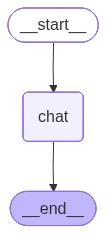

In [24]:
# build graph
from langgraph.graph import StateGraph,START,END

builder = StateGraph(myState)
builder.add_node("chat",assistant)
builder.add_edge(START,"chat")
builder.add_edge("chat",END)

graph = builder.compile()
graph

In [25]:
result = graph.invoke({"query":"What is capital of Canada?"})
print(result)

{'query': 'What is capital of Canada?', 'response': 'The capital of Canada is Ottawa.'}


In [26]:
print(result['response'])

The capital of Canada is Ottawa.


In [27]:
class myState(TypedDict):
    query:str
    response:str
    valid:bool

In [28]:
# adding an additional node: validting the input

# adding a node: checker which checks the input and validates based on certain rules
def checker(state:myState)->myState:
    if len(state['query'].strip())<10:
        return {"valid":False,"response":"ENTER A VALID QUESTION"}
    else:
        return {"valid":True}

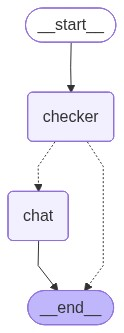

In [29]:
builder = StateGraph(myState)

builder.add_node("checker",checker)
builder.add_node("chat",assistant)

# add connection
builder.add_edge(START,"checker")


# add a conditional edge
def route(state:myState):
    if state['valid']:
        return "chat"
    else:
        return END
    
builder.add_conditional_edges("checker",route,{"chat":"chat",END:END})
builder.add_edge("chat",END)


graph = builder.compile()
graph

In [30]:
result = graph.invoke({"query":"what is capital of France?"})
print(result)

{'query': 'what is capital of France?', 'response': 'The capital of France is Paris.', 'valid': True}


In [31]:
result = graph.invoke({"query":"what ?       "})
print(result)

{'query': 'what ?       ', 'response': 'ENTER A VALID QUESTION', 'valid': False}


## Code Chain

- Generate code, analyze code

In [ ]:
from typing import TypedDict
from langchain_openai import AzureChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
llm = AzureChatOpenAI(model=model_name)

class simpleState(TypedDict):
    code:str
    task:str
    modified_code:str


def generate_code(state:simpleState)->simpleState:
    generate_prompt = ChatPromptTemplate([("system","Write a simple code for the task, only provide code no other additional text"),
                                      ("user","{task}")])
    code = llm.invoke(generate_prompt.invoke({"task":state["task"]})).content
    return {"code":code}


def analyze_code(state:simpleState)->simpleState:
    analyze_prompt = ChatPromptTemplate([("system","Analyze the provided code, add docstrings and comments. only provide code no other additional text"),
                                      ("user","{code}")])
    modified_code = llm.invoke(analyze_prompt.invoke({"code":state["code"]})).content
    return {"modified_code":modified_code}


builder = StateGraph(simpleState)
builder.add_sequence([generate_code,analyze_code])
builder.add_edge(START,"generate_code")

graph = builder.compile()
graph

    

In [ ]:
result = graph.invoke({"task":"FIBONACCI SERIES"})

In [ ]:
print(result)

{'code': '```python\ndef fibonacci(n):\n    fib_sequence = []\n    a, b = 0, 1\n    for _ in range(n):\n        fib_sequence.append(a)\n        a, b = b, a + b\n    return fib_sequence\n\nn = int(input("Enter the number of terms: "))\nprint(fibonacci(n))\n```', 'task': 'FIBONACCI SERIES', 'modified_code': '```python\ndef fibonacci(n):\n    """\n    Generate a Fibonacci sequence up to n terms.\n\n    Parameters:\n    n (int): The number of terms in the Fibonacci sequence to generate.\n\n    Returns:\n    list: A list containing the Fibonacci sequence up to n terms.\n    """\n    fib_sequence = []  # List to store the Fibonacci sequence\n    a, b = 0, 1  # Initialize the first two Fibonacci numbers\n    for _ in range(n):\n        fib_sequence.append(a)  # Append the current Fibonacci number to the sequence\n        a, b = b, a + b  # Update a and b to the next two Fibonacci numbers\n    return fib_sequence  # Return the list of Fibonacci numbers\n\nn = int(input("Enter the number of ter

In [ ]:
print(result['code'])

```python
def fibonacci(n):
    fib_sequence = []
    a, b = 0, 1
    for _ in range(n):
        fib_sequence.append(a)
        a, b = b, a + b
    return fib_sequence

n = int(input("Enter the number of terms: "))
print(fibonacci(n))
```


In [ ]:
print(result['modified_code'])

```python
def fibonacci(n):
    """
    Generate a Fibonacci sequence up to n terms.

    Parameters:
    n (int): The number of terms in the Fibonacci sequence to generate.

    Returns:
    list: A list containing the Fibonacci sequence up to n terms.
    """
    fib_sequence = []  # List to store the Fibonacci sequence
    a, b = 0, 1  # Initialize the first two Fibonacci numbers
    for _ in range(n):
        fib_sequence.append(a)  # Append the current Fibonacci number to the sequence
        a, b = b, a + b  # Update a and b to the next two Fibonacci numbers
    return fib_sequence  # Return the list of Fibonacci numbers

n = int(input("Enter the number of terms: "))  # Prompt user for the number of terms
print(fibonacci(n))  # Print the generated Fibonacci sequence
```
